In [1]:
import importlib

import myutils
importlib.reload(myutils)

import classifier
importlib.reload(classifier)

import matplotlib.pyplot as plt 

import numpy as np

import mypytable as mypytable
importlib.reload(mypytable)
from mypytable import MyPyTable 

import classifier as myclassifiers
importlib.reload(myclassifiers)

import myevaluation
importlib.reload(myevaluation)

from tabulate import tabulate

# **Asthma Diagnosis**

### Team members: Lauren Chin and Lauren Nguyen
### CPSC 322, Fall 2024

# Introduction
For this project, we worked to create models to predict a patient’s asthma diagnosis using an asthma disease dataset.
Asthma is a chronic lung disease that causes inflammation and tightening of airways, making it hard to breathe. We chose this topic because we got interested in medical models in our Biomedical ML course.

This dataset contains patient information for 2,392 patients who are diagnosed with asthma as well as those who don’t. 
It had 29 attributes such as Age, Gender, Ethnicity, BMI, Smoking, PhysicalActivity LungFunctionFEV1, LungFunctionFVC, and others.

Our diagnosis attribute was a binary attribute so a 0 or 1, but a challenge was there were many continuous attributes such as the BMI, LungFunctionFEV1, and PhysicalActivity attributes. 


Overall, we found that all three of our classifiers performed well (K-Nearest Neighbors, Naive Bayes, Random Forest), but the Random Forest more consistently had higher evaluation metrics than the other two models.


# Data Analysis

## Dataset

* Source: [Asthma Dataset](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset) 
* Format: CSV File
* Contents: This data set contains the patient information for those who are diagnosed with Asthma. Asthma is a chronic lung disease that causes inflamation and tightening of the airways, often making it hard to breathe. This dataset contains 2,392 different patients that involve their medical history, symptoms, allergies, and much more.
* Attributes:
    * `PatientID` - a unique identifier for each patient
    * `Age` - age of patient
    * `Gender` - 0 for male and 1 for female
    * `Ethnicity` - encoded as:
        * 0: Caucasian
        * 1: African American
        * 2: Asian
        * 3: Other
    * `EducationLevel` - encoded as:
        * 0: None
        * 1: High School
        * 2: Bachelors
        * 3: Higher
    * `BMI` - body mass index, ranges from 15-40
    * `Smoking` - 0 for no and 1 for yes
    * `PhysicalActivity` - weekly physical activity(hours), ranges 0-10
    * `DietQuality` - ranges from 0-10
    * `SleepQuality` - ranges from 4-10
    * `PollutionExposure` - scored from 0-10
    * `PollenExposure` - scored from 0-10
    * `DustExposure` - scored from 0-10
    * `LungFunctionFEV1` - Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
    * `LungFunctionFVC` - Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.
    * `PetAllergy`
    * `FamilyHistoryAsthma` 
    * `HistoryOfAllergies`
    * `Eczema` 
    * `HayFever` 
    * `GastroesophagealReflux`
    * `Wheezing`
    * `Coughing`
    * `ChestTightness`
    * `ShortnessOfBreath`
    * `NighttimeSymptoms`
    * `ExerciseInduced`
    * `DoctorInCharge` - doctor in charge, confidential for all instances
    * **`Diagnosis`** - diagnosis status for asthma patient. 0 for no and 1 for yes



## Implementation/Technical Merit

### Anticipated Challenges
* Pre-processing:
    * Because there are so many attributes, deciding to use a subset of them or all of them
        * To pare down the attributes, we could randomly select different subsets and compare the model performances to select the "best" attributes
        * However, we instead will likely use unsupervised learning to graph the attributes in comparison to the classifier attribute and determine which attributes have the strongest correlations and use those
    * Discretizing our dataset could be a challenge because there are many attributes with float values that are quite specific (lots of decimal places)
        * For example some of these attributes are: PhysicalActivity (0-10, but float long decimals), DietQuality (0-10, but float long decimals), SleepQuality (4-10, but float long decimals), and others

* Classification: 
    * Because there are so many attributes, making sure that we don't overfit our model
    

## Potential Impact of Results

* Why these results are useful:
    * We are looking at the asthma dataset with the goal of creating classifiers to predict if someone has asthma or not
    * These results are useful because it can help with medical diagnosis
    * While asthma isn't as life threatening as a disease like cancer, detection is still important so measures can be taken to help ease symptoms for patients

* Stakeholders:
    * Doctors (people who have to make the medical diagnosis)
    * Patients (people who could potentially have asthma)


## Loading Data

In [2]:
table = myutils.load('asthma_disease_data.csv')

headers = table.pop(0)

## Cleaning

1. Balancing dataset

In [3]:
# to hold positive diagnosises
yes = []

# to hold negative diagnosises
no = []

# split the data into positive and negative diagnosises
for i in range(len(table)):
    if table[i][-1] == "1":
        yes.append(table[i])
    else:
        no.append(table[i])

# shuffle no columns for randomization
myutils.randomize_in_place(no)

# combine the positive and negative diagnosises
table = yes + no[:1000]

# reshuffle the table
myutils.randomize_in_place(table)

## Exploratory Data Analysis (EDA)

For our dataset we will be using `Diagnosis` as our target feature. 

1. Number of instances & headers
1. Relevant statistics about the dataset
    * Average
    * Standard Deviation
    * Mode

## Summary Statistics

In [4]:
print("Number of rows: ", len(table))
print("Number of headers: ", len(headers))

Number of rows:  1000
Number of headers:  29


In [5]:
# Columns chosen for stats
columns = ['BMI', 'PollenExposure', 'Age', 'DietQuality', 'DustExposure']
statistics = ["Mean", "Standard Deviation", "Mode"]

# results of stats
results = []

# calculate the stats for each column
for stat in statistics:
    # row to hold the stats for each columnl
    row = [stat]

    # iterate through each column
    for column in columns:

        # get the data for the column
        column_data = list(map(float, myutils.get_column(table, headers, column)))

        # calculate the stats for the column
        if stat == "Mean":
            row.append(myutils.mean(column_data))
        elif stat == "Standard Deviation":
            row.append(myutils.stdev(column_data))
        elif stat == "Mode":
            row.append(myutils.mode(column_data))

    # add the row to the results
    results.append(row)

# print the results using tabulate
stats_headers = ["Statistic"] + columns
print(tabulate(results, headers=stats_headers, tablefmt="pretty"))

+--------------------+-------+----------------+-------+-------------+--------------+
|     Statistic      |  BMI  | PollenExposure |  Age  | DietQuality | DustExposure |
+--------------------+-------+----------------+-------+-------------+--------------+
|        Mean        | 27.37 |      5.13      | 41.62 |    4.93     |     4.91     |
| Standard Deviation |  7.2  |      2.95      | 21.87 |    2.89     |     2.83     |
|        Mode        | 15.05 |      0.2       |  7.0  |    0.66     |     0.08     |
+--------------------+-------+----------------+-------+-------------+--------------+


## Data Visualization
1. Distribution of Diagnosis

2. Visualizations for the following attributes:
    * Age vs. Diagnosis
    * Gender vs. Diagnosis
    * Ethnicity vs. Diagnosis
    * BMI vs. Diagnosis
    * Smoking vs. Diagnosis
    * PhysicalActivity vs. Diagnosis
    * PollutionExposure vs. Diagnosis
    * LungFunctionFEV1 vs. Diagnosis
    * LungFunctionFVC vs. Diagnosis

To do this we have chosen to stick to three different charts to show the distribution of these features. They are scatter plots, bar charts, and box plots. It is easy to see the distribution of the label within each type of this graph.

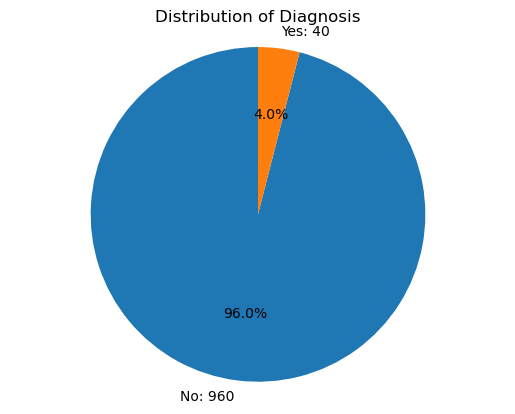

figure 1: Distribution of Diagnosis


In [6]:
np.random.seed(0)

# Diagnosis Distribution
y = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Calculate the counts of 0's and 1's
counts = [y.count(0), y.count(1)]

# Pie chart function
def pie_chart(labels, sizes, title):
    plt.figure()
    plt.backgroundcolor = 'white'
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.axis("equal")  # Equal aspect ratio so pie is drawn as circle
    plt.title(title)
    plt.show()

no_label = "No: " + str(y.count(0))
yes_label = "Yes: " + str(y.count(1))


# Call the function with labels (0 and 1) and their corresponding counts
pie_chart([no_label, yes_label], counts, "Distribution of Diagnosis")
print("figure 1: Distribution of Diagnosis")

figure 2: Scatter plot of Age vs Diagnosis


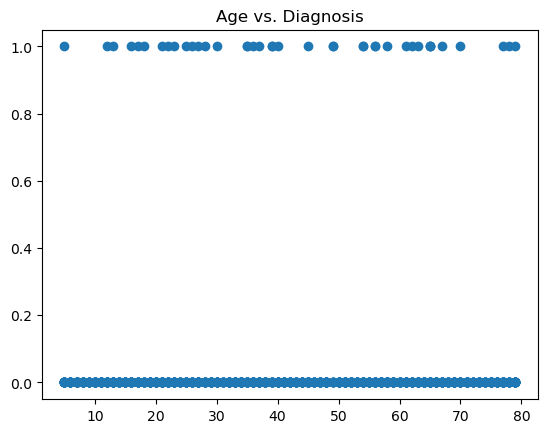

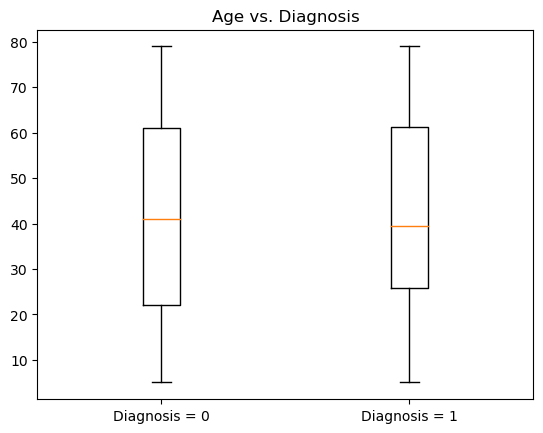

figure 3: Box plot of Age vs Diagnosis


In [7]:
# Age vs Diagnosis
x = [int(val) for val in myutils.get_column(table, headers, "Age")]

# Scatter Plot
plt.scatter(x,y)
plt.title("Age vs. Diagnosis")
print("figure 2: Scatter plot of Age vs Diagnosis")

# Box Plots
# Splitting age based on diagnosis
age_diagnosis_0 = [age for age, diag in zip(x, y) if diag == 0]
age_diagnosis_1 = [age for age, diag in zip(x, y) if diag == 1]

# Box plot function
def box_plot(distributions, labels, title):
    plt.figure()
    plt.boxplot(distributions, labels=labels)
    plt.title(title)
    plt.show()

# Calling the box plot function with the data
box_plot([age_diagnosis_0, age_diagnosis_1], ["Diagnosis = 0", "Diagnosis = 1"], "Age vs. Diagnosis")
print("figure 3: Box plot of Age vs Diagnosis")

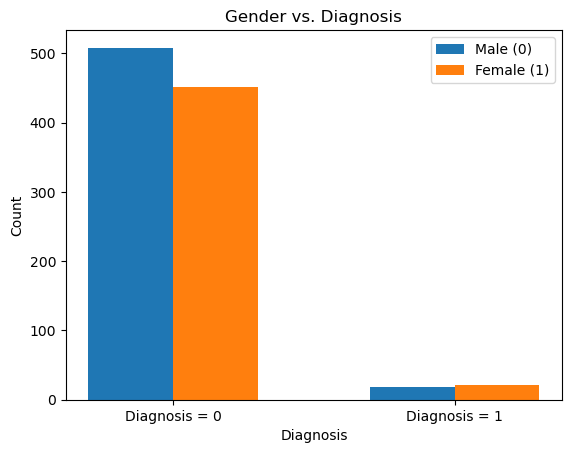

figure 4: bar chart of gender vs diagnosis


In [8]:
# Gender vs Diagnosis
x = [int(val) for val in myutils.get_column(table, headers, "Gender")]

# Counting the number of males (Gender = 0) and females (Gender = 1) for each Diagnosis category
gender_counts_0 = [sum(1 for gender, diag in zip(x, y) if gender == 0 and diag == 0),  # Male (Gender = 0) and Diagnosis = 0
                   sum(1 for gender, diag in zip(x, y) if gender == 0 and diag == 1)]  # Male (Gender = 0) and Diagnosis = 1

gender_counts_1 = [sum(1 for gender, diag in zip(x, y) if gender == 1 and diag == 0),  # Female (Gender = 1) and Diagnosis = 0
                   sum(1 for gender, diag in zip(x, y) if gender == 1 and diag == 1)]  # Female (Gender = 1) and Diagnosis = 1

# Bar chart function
def bar_chart(x, y, title):
    plt.figure()
    width = 0.3  # Width of bars
    index = np.arange(len(x))  # Positions of bars
    
    # Plotting bars for males and females
    plt.bar(index - width/2, y[0], width, label="Male (0)")  # Bars for males
    plt.bar(index + width/2, y[1], width, label="Female (1)")  # Bars for females
    
    # Adding labels, title, and legend
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(index, x)  # Set x-axis labels to 'Diagnosis = 0' and 'Diagnosis = 1'
    plt.legend()
    
    plt.show()

# Labels and counts for bar chart
labels = ['Diagnosis = 0', 'Diagnosis = 1']
# Counts for males and females in a tuple (male counts, female counts)
counts = [gender_counts_0, gender_counts_1]

# Calling the bar chart function with the data
bar_chart(labels, counts, "Gender vs. Diagnosis")
print("figure 4: bar chart of gender vs diagnosis")

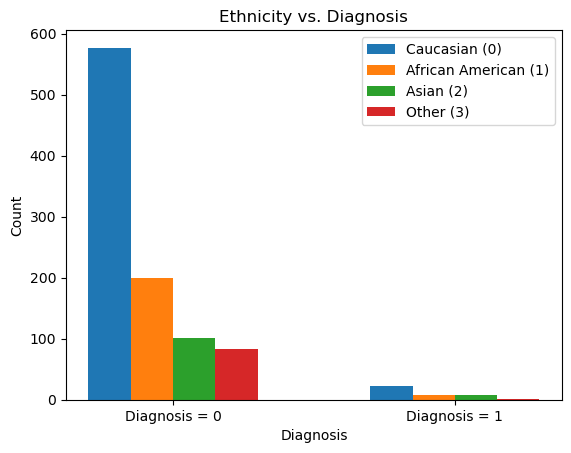

figure 5: bar chart of ethinicitys vs diagnosis


In [9]:
# Ethnicity vs Diagnosis
x = [int(val) for val in myutils.get_column(table, headers, "Ethnicity")]

# Counting the number of individuals in each ethnicity group (0: Caucasian, 1: African American, 2: Asian, 3: Other) for each Diagnosis category
ethnicity_counts_0 = [
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 0 and diag == 0),  # Caucasian (Ethnicity = 0) and Diagnosis = 0
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 0 and diag == 1)   # Caucasian (Ethnicity = 0) and Diagnosis = 1
]

ethnicity_counts_1 = [
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 1 and diag == 0),  # African American (Ethnicity = 1) and Diagnosis = 0
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 1 and diag == 1)   # African American (Ethnicity = 1) and Diagnosis = 1
]

ethnicity_counts_2 = [
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 2 and diag == 0),  # Asian (Ethnicity = 2) and Diagnosis = 0
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 2 and diag == 1)   # Asian (Ethnicity = 2) and Diagnosis = 1
]

ethnicity_counts_3 = [
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 3 and diag == 0),  # Other (Ethnicity = 3) and Diagnosis = 0
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 3 and diag == 1)   # Other (Ethnicity = 3) and Diagnosis = 1
]

# Bar chart function
def bar_chart(x, y, title):
    plt.figure()
    width = 0.15  # Width of bars
    index = np.arange(len(x))  # Positions of bars
    
    # Plotting bars for each ethnicity
    plt.bar(index - 1.5 * width, y[0], width, label="Caucasian (0)")  # Bars for Caucasian
    plt.bar(index - 0.5 * width, y[1], width, label="African American (1)")  # Bars for African American
    plt.bar(index + 0.5 * width, y[2], width, label="Asian (2)")  # Bars for Asian
    plt.bar(index + 1.5 * width, y[3], width, label="Other (3)")  # Bars for Other
    
    # Adding labels, title, and legend
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(index, x)  # Set x-axis labels to 'Diagnosis = 0' and 'Diagnosis = 1'
    plt.legend()
    
    plt.show()

# Labels and counts for bar chart
labels = ['Diagnosis = 0', 'Diagnosis = 1']
# Counts for each ethnicity group in a tuple (Caucasian counts, African American counts, Asian counts, Other counts)
counts = [ethnicity_counts_0, ethnicity_counts_1, ethnicity_counts_2, ethnicity_counts_3]

# Calling the bar chart function with the data
bar_chart(labels, counts, "Ethnicity vs. Diagnosis")
print("figure 5: bar chart of ethinicitys vs diagnosis")

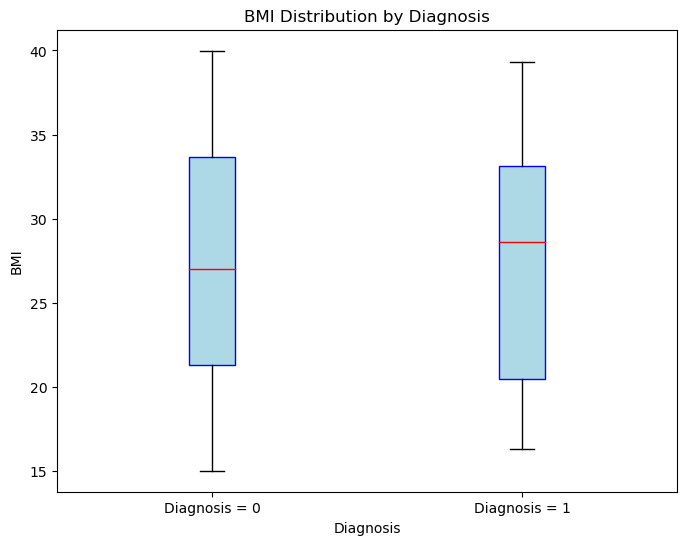

figure 6: box plot of BMI vs diagnosis


In [10]:
# BMI vs Diagnosis
bmi_values = [float(val) for val in myutils.get_column(table, headers, "BMI")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the BMI values for each diagnosis category
bmi_diagnosis_0 = [bmi for bmi, diag in zip(bmi_values, diagnosis_values) if diag == 0]
bmi_diagnosis_1 = [bmi for bmi, diag in zip(bmi_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(bmi_diagnosis_0, bmi_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [bmi_diagnosis_0, bmi_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('BMI')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(bmi_diagnosis_0, bmi_diagnosis_1, "BMI Distribution by Diagnosis")
print("figure 6: box plot of BMI vs diagnosis")

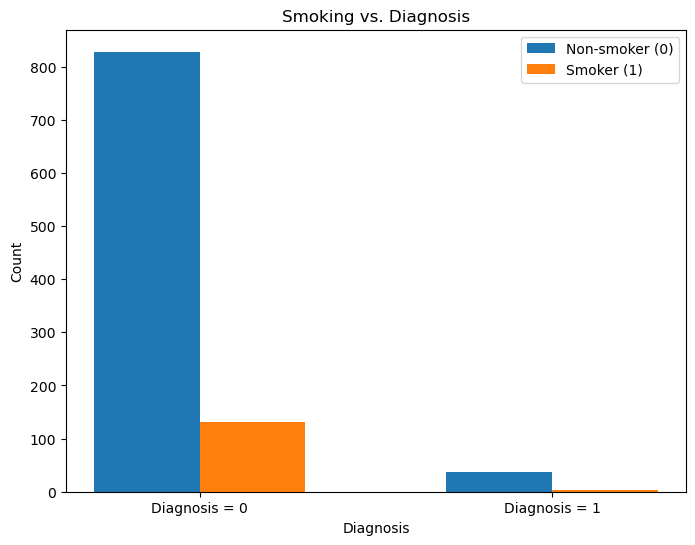

figure 7: bar chart of smoking vs diagnosis


In [11]:
# Smoking vs Diagnosis
smoking_values = [int(val) for val in myutils.get_column(table, headers, "Smoking")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Counting the number of smokers (Smoking = 1) and non-smokers (Smoking = 0) for each Diagnosis category
smoking_counts_0 = [
    sum(1 for smoking, diag in zip(smoking_values, diagnosis_values) if smoking == 0 and diag == 0),  # Non-smokers (Smoking = 0) and Diagnosis = 0
    sum(1 for smoking, diag in zip(smoking_values, diagnosis_values) if smoking == 0 and diag == 1)   # Non-smokers (Smoking = 0) and Diagnosis = 1
]

smoking_counts_1 = [
    sum(1 for smoking, diag in zip(smoking_values, diagnosis_values) if smoking == 1 and diag == 0),  # Smokers (Smoking = 1) and Diagnosis = 0
    sum(1 for smoking, diag in zip(smoking_values, diagnosis_values) if smoking == 1 and diag == 1)   # Smokers (Smoking = 1) and Diagnosis = 1
]

# Bar chart function
def bar_chart(x, y, title):
    plt.figure(figsize=(8, 6))
    width = 0.3  # Width of bars
    index = np.arange(len(x))  # Positions of bars
    
    # Plotting bars for non-smokers and smokers
    plt.bar(index - width/2, y[0], width, label="Non-smoker (0)")  # Bars for non-smokers
    plt.bar(index + width/2, y[1], width, label="Smoker (1)")  # Bars for smokers
    
    # Adding labels, title, and legend
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(index, x)  # Set x-axis labels to 'Diagnosis = 0' and 'Diagnosis = 1'
    plt.legend()
    
    plt.show()

# Labels and counts for bar chart
labels = ['Diagnosis = 0', 'Diagnosis = 1']
# Counts for non-smokers and smokers in a tuple (non-smoker counts, smoker counts)
counts = [smoking_counts_0, smoking_counts_1]

# Calling the bar chart function with the data
bar_chart(labels, counts, "Smoking vs. Diagnosis")
print("figure 7: bar chart of smoking vs diagnosis")

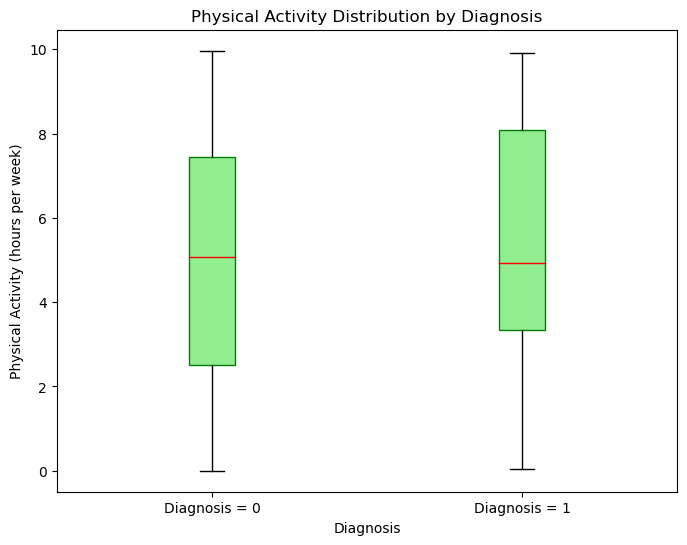

figure 8: box plot of physical activity vs diagnosis


In [12]:
# PhysicalActivity vs Diagnosis
physical_activity_values = [float(val) for val in myutils.get_column(table, headers, "PhysicalActivity")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the physical activity values for each diagnosis category
activity_diagnosis_0 = [activity for activity, diag in zip(physical_activity_values, diagnosis_values) if diag == 0]
activity_diagnosis_1 = [activity for activity, diag in zip(physical_activity_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(activity_diagnosis_0, activity_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [activity_diagnosis_0, activity_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightgreen', color='green'),
                medianprops=dict(color='red'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('Physical Activity (hours per week)')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(activity_diagnosis_0, activity_diagnosis_1, "Physical Activity Distribution by Diagnosis")
print("figure 8: box plot of physical activity vs diagnosis")

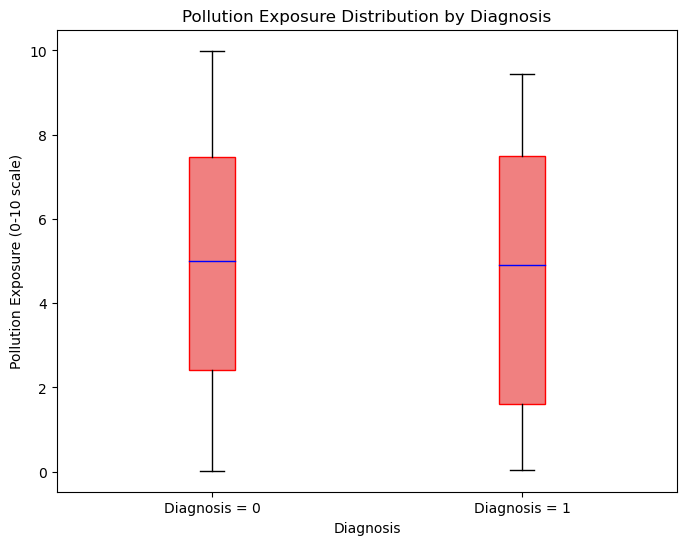

figure 9: box plot of pollution exposure vs diagnosis


In [13]:
# PollutionExposure vs Diagnosis
pollution_values = [float(val) for val in myutils.get_column(table, headers, "PollutionExposure")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the pollution exposure values for each diagnosis category
pollution_diagnosis_0 = [pollution for pollution, diag in zip(pollution_values, diagnosis_values) if diag == 0]
pollution_diagnosis_1 = [pollution for pollution, diag in zip(pollution_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(pollution_diagnosis_0, pollution_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [pollution_diagnosis_0, pollution_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightcoral', color='red'),
                medianprops=dict(color='blue'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('Pollution Exposure (0-10 scale)')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(pollution_diagnosis_0, pollution_diagnosis_1, "Pollution Exposure Distribution by Diagnosis")
print("figure 9: box plot of pollution exposure vs diagnosis")

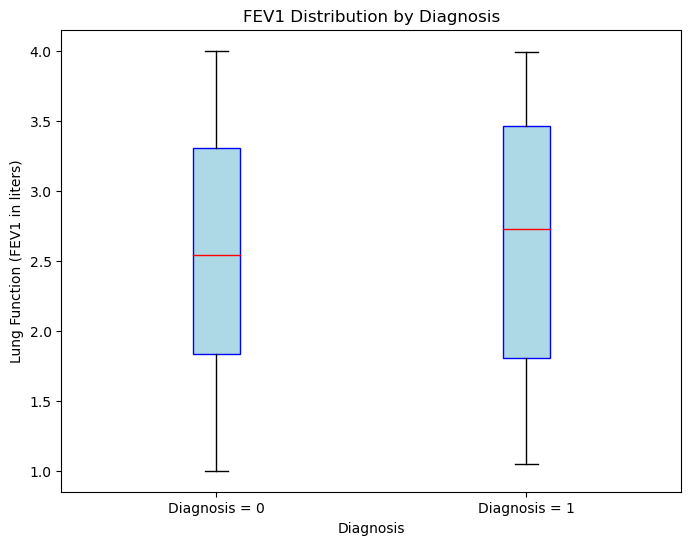

figure 10: box plot of FEV1 vs diagnosis


In [14]:
# LungFunctionFEV1 vs Diagnosis
fev1_values = [float(val) for val in myutils.get_column(table, headers, "LungFunctionFEV1")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the FEV1 values for each diagnosis category
fev1_diagnosis_0 = [fev1 for fev1, diag in zip(fev1_values, diagnosis_values) if diag == 0]
fev1_diagnosis_1 = [fev1 for fev1, diag in zip(fev1_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(fev1_diagnosis_0, fev1_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [fev1_diagnosis_0, fev1_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('Lung Function (FEV1 in liters)')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(fev1_diagnosis_0, fev1_diagnosis_1, "FEV1 Distribution by Diagnosis")
print("figure 10: box plot of FEV1 vs diagnosis")


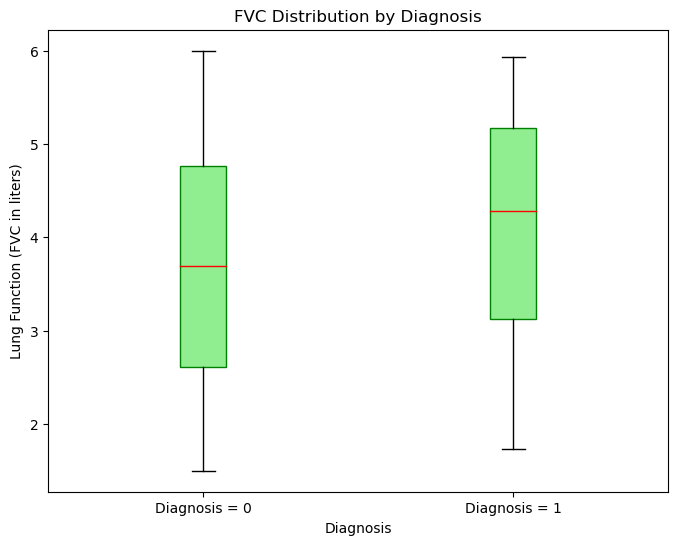

figure 11: box plot of FVC vs diagnosis


In [15]:
# LungFunctionFVC vs Diagnosis
fvc_values = [float(val) for val in myutils.get_column(table, headers, "LungFunctionFVC")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the FVC values for each diagnosis category
fvc_diagnosis_0 = [fvc for fvc, diag in zip(fvc_values, diagnosis_values) if diag == 0]
fvc_diagnosis_1 = [fvc for fvc, diag in zip(fvc_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(fvc_diagnosis_0, fvc_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [fvc_diagnosis_0, fvc_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightgreen', color='green'),
                medianprops=dict(color='red'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('Lung Function (FVC in liters)')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(fvc_diagnosis_0, fvc_diagnosis_1, "FVC Distribution by Diagnosis")
print("figure 11: box plot of FVC vs diagnosis")

# Classification Results
For this asthma diagnosis classification, we implemented three classifiers:
* K-Nearest Neighbors (KNN)
    * Calculated 3 nearest neighbors (smallest distance to instance)
    * Then took majority classification label for the 3 closest instances
* Naive Bayes
    * Calculated priors (probabilities of attributes having certain values)
    * Calculated prediction using algorithm's equation of multiplying priors to see probability that attribute is a certain label
    * Then using label with higher probability for classification label
* Random Forest
    * Generated N random decision trees with F attributes (for a subset of the available attributes)
    * Then selected M of the best decision trees
    * To predict then we predicted the unseen instance on all of the M selected decision trees and took the majority diagnosis label as the classification label

We fitted each of the models using our asthma disease dataset. 
We then performed K-fold cross validation, splitting into 10 folds.
For each fold, we split the data into the training and testing sets, and for each fold we trained using the training set (X_train, and y_train), and then we predicted using the testing set (X_test, y_test). 
For each of the 10 folds, we kept track of the accuracy, error rate, precision, recall, and f1 scores. Accuracy and error rate are a good basic evaluation metric, but because we were worried about overfitting and because we are working with medical data, we thought it was best to have more informative evaluation metrics such as the precision, recall, and f1 scores.
We then averaged the values over the 10 folds for each classifier and printed their values.

They all had consistently high accuracy scores with Naive Bayes and Random Forest being slightly higher in accuracy than KNN. 

However, we chose the Random Forest Classifier as our “best” classifier for the dataset because it consistently had about the same or better precision, recall, and f1 scores. 

There was a bit of variation everytime we ran the models because it randomly selected the group of patients with an asthma diagnosis of “0” in our beginning, but we found that through running the models many times, although the models were similar, the Random Forest had slightly better and more consistent evaluation metric values.



In [16]:
import numpy as np

def preprocess_data(data: MyPyTable):
    """Convert categorical columns in the data to numeric values."""
    # List of categorical columns that need encoding
    categorical_columns = ['Gender', 'Ethnicity', 'EducationLevel', 'Diagnosis']
    
    # Encode categorical columns to numeric values
    for col in categorical_columns:
        column_data = data.get_column(col)
        unique_values = list(set(column_data))  # Get unique values
        
        # Create a mapping of unique values to integers
        value_to_int = {value: idx for idx, value in enumerate(unique_values)}
        
        # Replace categorical values with their numeric representation
        encoded_column = [value_to_int[value] for value in column_data]
        
        # Update the column with the encoded values
        data.update_column(col, encoded_column)
        
    return data


In [17]:
# creating a MyPyTable object and loading from file
print("\nLoading data from asthma_disease_data.csv file")
asthma_data = mypytable.MyPyTable()
asthma_data.load_from_file("asthma_disease_data.csv")
asthma_data.data = [row[:-1] for row in table]  # Removes last column from every row
asthma_data.column_names = headers[:-1]

# Preprocess data before using it in kNN
asthma_data = preprocess_data(asthma_data)


def cross_val_predict_extended_knn(data: MyPyTable, n_splits: int = 10):
    """ This function computes the predictive
    accuracy and error rate for knn
    using k-fold cross validation. It takes in MyPyTable
    with data filled in, and value of splits.
    Then prints out info nicely. 
    This function is now extended to calculate
    precision, recall, f1 score.
    
    Args:
        data (MyPyTable): MyPyTable object with data filled in
        n_splits(int): k number of splits
    """
    accuracy_results = []
    error_rate_results = []
    precision_results = []
    recall_results = []
    f1_results = []

    confusion_matricies = []
    
    # Extract features and target variable as lists
    bmi = list(map(float, data.get_column('BMI')))  # Convert BMI to float
    smoking = list(map(float, data.get_column('Smoking')))  # Encode Smoking
    physical_activity = [1 if float(x) > 5.0 else 0 for x in data.get_column('PhysicalActivity')]  # Encode PhysicalActivity
    lung_function = list(map(float, data.get_column('LungFunctionFEV1')))  # Convert LungFunction to float
    target = data.get_column('Diagnosis')  # Diagnosis is assumed to be numeric

    # Combine features into a single list of features
    features = list(zip(bmi, smoking, physical_activity, lung_function))  # Now each entry is numeric

    # Generate k-fold splits
    folds = myevaluation.kfold_split(features, n_splits=n_splits, shuffle=True, random_state = 0)

    for train_indices, test_indices in folds:
        X_train = [features[i] for i in train_indices]  # Use combined features
        y_train = [target[i] for i in train_indices]  # Use target
        X_test = [features[i] for i in test_indices]  # Use combined features
        y_test = [target[i] for i in test_indices]  # Use target

        # Skip if the test set is empty
        if len(y_test) == 0:
            continue

        # Initialize and train kNN classifier with the categorical flag
        knn = classifier.MyKNeighborsClassifier()
        knn.fit(X_train, y_train)

        # Get predictions for the test set
        knn_predictions = knn.predict(X_test)
        knn_accuracy = myevaluation.accuracy_score(y_test, knn_predictions)
        knn_error_rate = 1 - knn_accuracy
        knn_precision = myevaluation.binary_precision_score(y_test, knn_predictions, pos_label = 1)
        knn_recall = myevaluation.binary_recall_score(y_test, knn_predictions, pos_label = 1)
        knn_f1 = myevaluation.binary_f1_score(y_test, knn_predictions, pos_label = 1)

        # Log the results
        accuracy_results.append(knn_accuracy)
        error_rate_results.append(knn_error_rate)
        precision_results.append(knn_precision)
        recall_results.append(knn_recall)
        f1_results.append(knn_f1)

        # Create and append confusion matrix
        confusion_matrix = myevaluation.confusion_matrix(y_test, knn_predictions, ["yes", "no"])
        confusion_matricies.append(confusion_matrix)

    # Calculate average accuracy and error rate
    avg_knn_accuracy = sum(result for result in accuracy_results) / n_splits if accuracy_results else 0
    avg_knn_error_rate = sum(result for result in error_rate_results) / n_splits if error_rate_results else 0
    avg_knn_precision = sum(result for result in precision_results) / n_splits if precision_results else 0
    avg_knn_recall = sum(result for result in recall_results) / n_splits if recall_results else 0
    avg_knn_f1 = sum(result for result in f1_results) / n_splits if f1_results else 0
    
    # Print the results
    print("===========================================")
    print("k Nearest Neighbors Classifier")
    print("===========================================")
    print(f"{10}-Fold Cross Validation")
    print(f"accuracy = {avg_knn_accuracy:.2f}, error rate = {avg_knn_error_rate:.2f}")
    print(f"precision = {avg_knn_precision:.2f}, recall = {avg_knn_recall:.2f}, f1 = {avg_knn_f1:.2f}")


# Using function/printing
cross_val_predict_extended_knn(asthma_data, n_splits=10)



Loading data from asthma_disease_data.csv file
k Nearest Neighbors Classifier
10-Fold Cross Validation
accuracy = 0.96, error rate = 0.05
precision = 0.96, recall = 0.99, f1 = 0.98


### Naive Bayes !

In [18]:
accuracy_results = []
error_rate_results = []
precision_results = []
recall_results = []
f1_results = []

# Extract features and target variable as lists
bmi = list(map(float, asthma_data.get_column('BMI')))  # Convert BMI to float
smoking = asthma_data.get_column('Smoking')  # Encode Smoking
physical_activity = [1 if float(x) > 5.0 else 0 for x in asthma_data.get_column('PhysicalActivity')]  # Encode PhysicalActivity
lung_function = list(map(float, asthma_data.get_column('LungFunctionFEV1')))  # Convert LungFunction to float
y_data = asthma_data.get_column('Diagnosis')  # Diagnosis is assumed to be numeric

# Combine features into a single list of features
X_data = list(zip(bmi, smoking, physical_activity, lung_function))  # Now each entry is numeric

# Assuming `evaluation.kfold_split` will split the train data for cross-validation
folds = myevaluation.kfold_split(X_data, n_splits=10, shuffle=True, random_state=0)

# Initialize counters for correct predictions
naive_bayes_correct = 0
total_samples = len(y_data)  # Use the correct number of samples for accuracy calculation
y_test_fold = []
y_pred_nb = []
# Loop over each fold
for train_indices, test_indices in folds:
    X_train_fold = [X_data[i] for i in train_indices]
    y_train_fold = [y_data[i] for i in train_indices]
    X_test_fold = [X_data[i] for i in test_indices]
    y_test_fold = [y_data[i] for i in test_indices]

    # Naive Bayes Classifier: Predict using Naive Bayes
    my_naive_bayes = classifier.MyNaiveBayesClassifier()
    my_naive_bayes.fit(X_train_fold, y_train_fold)
    y_pred_nb = my_naive_bayes.predict(X_test_fold)
    naive_bayes_correct += sum(y_pred_nb[i] == y_test_fold[i] for i in range(len(y_test_fold)))

    nb_accuracy = myevaluation.accuracy_score(y_test_fold, y_pred_nb)
    nb_error_rate = 1 - nb_accuracy
    nb_precision = myevaluation.binary_precision_score(y_test_fold, y_pred_nb, pos_label = 1)
    nb_recall = myevaluation.binary_recall_score(y_test_fold, y_pred_nb, pos_label = 1)
    nb_f1 = myevaluation.binary_f1_score(y_test_fold, y_pred_nb, pos_label = 1)

    # Log the results
    accuracy_results.append(nb_accuracy)
    error_rate_results.append(nb_error_rate)
    precision_results.append(nb_precision)
    recall_results.append(nb_recall)
    f1_results.append(nb_f1)


# Calculate average accuracy and error rate
avg_nb_accuracy = sum(result for result in accuracy_results) / 10 if accuracy_results else 0
avg_nb_error_rate = sum(result for result in error_rate_results) / 10 if error_rate_results else 0
avg_nb_precision = sum(result for result in precision_results) / 10 if precision_results else 0
avg_nb_recall = sum(result for result in recall_results) / 10 if recall_results else 0
avg_nb_f1 = sum(result for result in f1_results) / 10 if f1_results else 0

# Print the results
print("===========================================")
print("Naive Bayes Classifier")
print("===========================================")
print(f"{10}-Fold Cross Validation")

print(f"accuracy = {nb_accuracy:.2f}, error rate = {nb_error_rate:.2f}")
print(f"precision = {avg_nb_precision:.2f}, recall = {avg_nb_recall:.2f}, f1 = {avg_nb_f1:.2f}")


Naive Bayes Classifier
10-Fold Cross Validation
accuracy = 0.96, error rate = 0.04
precision = 0.96, recall = 1.00, f1 = 0.98


In [19]:
# Extract features and target variable as lists
bmi = list(map(float, asthma_data.get_column('BMI')))  # Convert BMI to float
bmi = myutils.discretize_bmi(bmi)
smoking = asthma_data.get_column('Smoking')
physical_activity = list(map(float, asthma_data.get_column('PhysicalActivity'))) # Encode PhysicalActivity
physical_activity = myutils.discretize_physicalactivity(physical_activity)
lung_function = list(map(float, asthma_data.get_column('LungFunctionFEV1')))  # Convert LungFunction to float
lung_function = myutils.discretize_lungfunction(lung_function)
y_data = asthma_data.get_column('Diagnosis')  # Diagnosis is assumed to be numeric

# Combine features into a single list of features
X_data = list(zip(bmi, smoking, physical_activity, lung_function))  # Now each entry is numeric

# # Assuming `evaluation.kfold_split` will split the train data for cross-validation
folds = myevaluation.kfold_split(X_data, n_splits=10, shuffle=True, random_state=0)

# Initialize counters for correct predictions
random_forest_correct = 0
total_samples = len(y_data)  # Use the correct number of samples for accuracy calculation
y_test_fold = []
y_pred_rf = []

# Loop over each fold
for train_indices, test_indices in folds:
    X_train_fold = [X_data[i] for i in train_indices]
    y_train_fold = [y_data[i] for i in train_indices]
    X_test_fold = [X_data[i] for i in test_indices]
    y_test_fold = [y_data[i] for i in test_indices]

    # Random Forest Classifier: Predict using Random Forest
    my_random_forest = classifier.MyRandomForestClassifier( N=6, M=1, F=4, seed=0)
    my_random_forest.fit(X_train_fold, y_train_fold)
    y_pred_rf = my_random_forest.predict(X_test_fold)
    random_forest_correct += sum(y_pred_rf[i] == y_test_fold[i] for i in range(len(y_test_fold)))

# Calculate accuracy and error rate
rf_accuracy = random_forest_correct / total_samples
rf_error_rate = 1 - rf_accuracy
rf_binary_precision_score = myevaluation.binary_precision_score(y_test_fold, y_pred_rf, pos_label = 1)
rf_binary_recall_score = myevaluation.binary_recall_score(y_test_fold, y_pred_rf, pos_label = 1)
rf_binary_f1_score = myevaluation.binary_f1_score(y_test_fold, y_pred_rf, pos_label = 1)
# Print the results
print("===========================================")
print("Random Forest Classifier")
print("===========================================")
print(f"{10}-Fold Cross Validation")

print(f"accuracy = {rf_accuracy:.2f}, error rate = {rf_error_rate:.2f}")
print(f"precision = {rf_binary_precision_score:.2f}, recall = {rf_binary_recall_score:.2f}, f1 = {rf_binary_f1_score:.2f}")

Random Forest Classifier
10-Fold Cross Validation
accuracy = 0.96, error rate = 0.04
precision = 0.95, recall = 1.00, f1 = 0.97


## Comparing the Classifiers
* Random Forest classifier
* KNN classifier
* Naive Bayes classifier

**"Best" classifier: random forest classifier**

There was a bit of subjectivity in choosing what we thought was the best classifier because each time we run the notebook, there is a slightly new subset of the data that is used because there are random selections of which of the patients without asthma are being selected. This was the step we took to ensure that the data was as balanced as it could be. There are other aspects of randomness, but we tried to seed those so there isn't as much variation between runs of the notebook.

The random forest classifier consistently had one of the **highest accuracy** values, while naive bayes had a very close accuracy value, and knn often had a slightly lower accuracy of.

However, it is notable that all of the classifiers had an accuracy value around 0.95 everytime we ran the notebook which is a good accuracy value.

In terms of error rate, the random forest classifier again consistently had one of the **lowest error rates**, amongst the three classifiers. 

The random forest classifier also very consistently had the **highest values for precision , recall, and f1** or was close to the highest values for these metrics out of the three classifiers. 


# Classification Web App
Create a Flask web app with this “best” classifier deployed with an API interface. For the base project (i.e., not bonus), your web app only has to run locally. Part of the bonus is to deploy your web app:
BONUS (5 pts): Deploy your Flask web app to a free hosting service such as Render (you do not have to use Render, you may use a different service if you wish). In your repo README.md and your project report, include a link to a deployed web app hosting your Flask app.
BONUS (3 pts): Add a user interface to your Flask web app on the index/homepage. The interface should allow the user to enter in attribute values for an unseen instance via a form, press a “Predict” button, and see the prediction for the instance. See the completed Flask-App-Demo repo on Github for a template of how to do this with Flask and a POST request (I will post this after we cover it in class).

For this flask app, we deployed a API interface with our "best" classifier which was the **random forest classifier**


We had some difficulty getting the predict to work using the pickling files. We could got the trees to fit and then we pickled them in the tree_pickler.py file and unpickled them in the asthma_app.py file, however when we were trying to traverse each of these trees and take the majority count, there was some sort of bug that we just couldn't find. We tried debugging a lot, but we were unsuccessful, so we ended up having the fit and predict again in the asthma_app.py file. It did slightly defeat the purpose of the pickling of the trees and then unpickling them, but we did learn a lot about it through the process and challenges we faced.


We also completed the **BONUS** here because we deployed the flask web app to the Render free hosting service. 

Use this [link](https://cpsc322-final-project.onrender.com) to view it!

For the user interface, we modeled it off Dr. Gina Sprint's in class example, but we edited it to take in our values and predict the asthma diagnosis! It uses the form and then via the "Predict Asthma Diagnosis" button, the user can see the prediction for the instance. 

**Our Approach**
* For our Flask app, we used the basic idea from Gina's class example with the interview predictor.
* We kept a similar interface because we thought it was clean and simple
* We used the get route to get the inputs
* We discretized and made sure the inputs were of the correct type for the model
* We then calculated the prediction with the fitted random forest classifier
* We then used the post route to post the prediction results

**How to Use Our API**
* On the website for BMI enter a value between 15 and 40 (decimal value) to represent body mass index
* For Smoking, enter either 0 if you don't smoke or 1 if you do
* For PhysicalActivity, enter a value between 0 and 10 for the hours you exercise per week (can be decimal value)
* For LungFunctionFEV1, enter a value between 1.0 and 4.0 liters for your lung function for Forced Expiratory Volume in 1 second (decimal value)
* Then click the "Predict Asthma Diagnosis" button to get the prediction!

# Conclusion

In summary, our project used an Asthma Diagnosis dataset to predict if a patient had asthma or not. The classifiers we had chose was: Naive Bayes, kNN, and Random Forest. We fit and trained on all the same params:

* BMI
* PhysicalActivity
* Smoking
* LungFunctionFEV1

In the end we found that our Random Forest was our best model as it had the best accuracy and recall out of the three. We had faced a lot of challenges when creating this project. First was that our dataset was unbalanced. There was a significantly larger amount of negative diagnosises compared to positive which led to our datset and results being skewed. To resolve this, we shurnk our dataset to even out both positive and negative diagnosises. Another issue we ran into was the development of our RandomForest algorithm. The intial trials of testing and producing trees for our dataset were overfit and created too many rules. As a result, whenever we tried to predict the tree leafs were to specific to the training data and predictions were returning as a `None`. To fix this we decided to discretize our data to make each point more uniform and easier to parse into a tree.

Our classifiers performances were good with each of our classifiers having above a 90% each time. We believe that if given more time, we could improve each performance. Obviously with RandomForest, finetuning the parameters more like `N`, `M`, or `F`. Additionally with kNN and Naive Bayes, we could look at different k's for kNN or different k-fold split sizes for Naive Bayes. Also finding more instances of positive diagnosises to add to our dataset to balance out the positives and negatives could benefit our classifiers greatly.

# Acknowledgments

* Kaggle Dataset
    * Our data source for this project was this [kaggle dataset](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset)
    * This dataset was for the asthma data and it was highly rated for usability on Kaggle

* CPSC 322 Resources
    * We also used a lot of our CPSC 322 prior resources such as our programming assignments (PAs) and worksheets for information
    * We used some of our prior functions, and classifiers

* Dr. Gina Sprint
    * We also used Dr. Gina Sprint's resources provided to the class, especially this [repository](https://github.com/GonzagaCPSC322/Flask-App-Demo/blob/master/templates/index.html) to help us with Flask

Other than that we didn't use any other resources to work on this project. 

We occassionally attempted to ask ChatGPT to help us find where to debug our code or where our code was going wrong, but it wasn't very helpful, so we didn't use it much.
